# TFT 
#### TFT PREPROCESSING
Before making TFT I had to process the data in a format that TFT liked. In TFT each rm_id or group of timeseries needs to have continous time indexes, or else it supposedly only thinks that data was missing for those time indexes. To do this I set each rm_id to start with time index 0 on their first receival. I also aggregated each receival to be daily, and if there was no receival in days between I set them to 0. I also set from the last receival to end of 2024 to 0 and set their time index as X days after the first receivals as I wanted the model to learn that some time series stopped getting receivals

##### TFT CREATION
To create TFT I followed a tutorial on the internet, but tweaked it to our usecase. As I had tried a lot to make it working I just wanted to make a simple model with few features before doing more: rm_id, local_time_idx, net_weight, special_days, month, day_of_week, is_holiday, quantity, and log_weight. The max_encoder_length and max_prediction_length I set to 365 and 151 respectively as we needed to predict 151 days in the future, and I wanted the 365 days before to be weighed more when predicting the 151 days in the future.

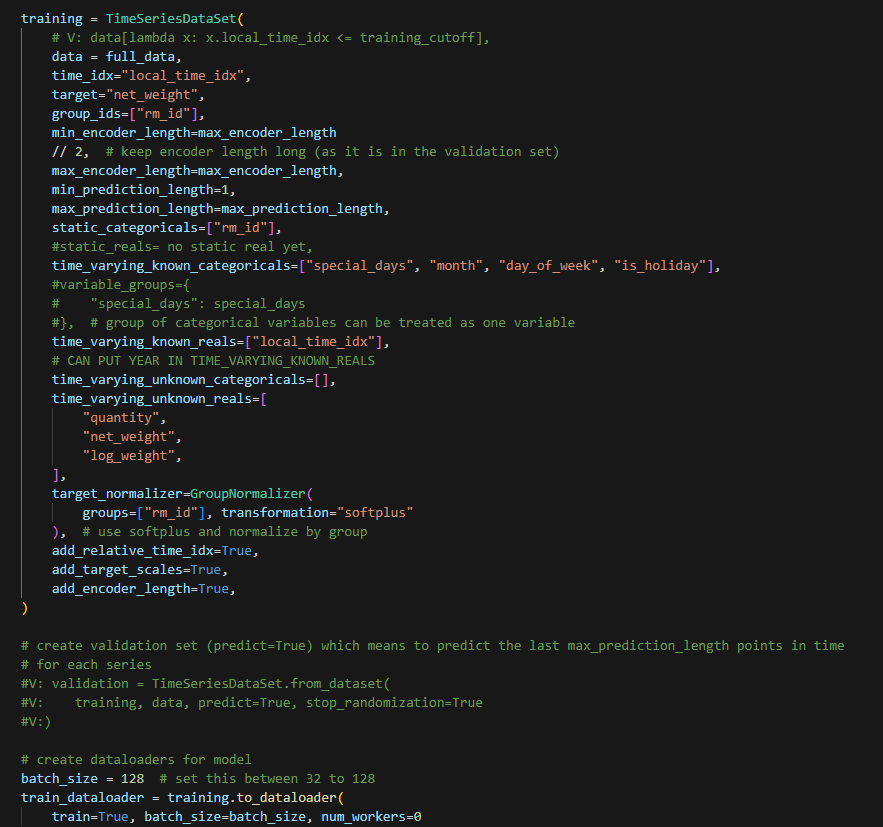

For the hyperparameters I just set them to default before trying more, but trained on gpu as it was much faster to train with gpu than cpu

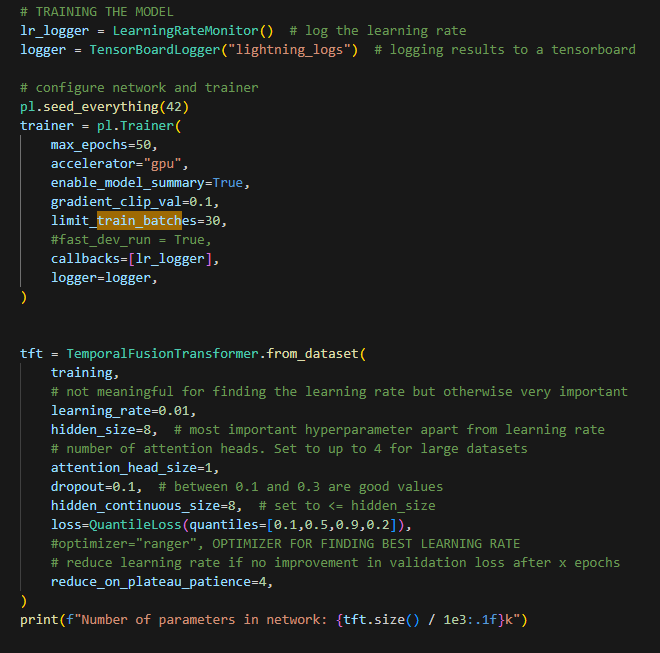

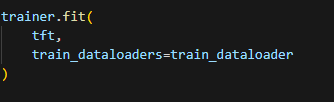

Afterwards I had to create a pandaframe containing the 365 days before start of 2025 and 151 days into 2025 for each rm_id as I set the encoder length to 365 and decoder length to 151. For the 365 days we know all the parameters, but for the future aka 151 we set the unknown parameters: quantity, net_weight, log_weight as 0 as TFT would predict this for us, or atleast our target value "net_weight" explicitly. Then by setting this dataframe containing 365+151 timesteps into tft.predict(...) we got a prediction. We tried with different quantiles, but 0.2 quantile would give us predicted 0 for almost all rm_ids. This may have been because we have so many 0's in our data and if there is few receivals the model may just predict 0 because the predicted weight is low or it's just too hard to pinpoint which day the receival will happen, so the loss wil be immense if it fails as we had a 0.2 quantile loss. By choosing 0.5 quantile loss and multiplying by 0.8 (to underpredict) we got a pretty good score varying between 6000-4000 depending on the GPU we used, but we saw that it still predicted too few rm_ids as 2024 had like 40 unique rm_ids with receivals, but we only got like 12. We therefore chose to just fallback on 2024 baseline aka just repeat 2024 multiplied by 0.7 if the rm_id was in 2024 and not in our tft prediction. But that gave us a pretty bad score at like 9000, so we filtered out the rm_ids that ended their receival 40 days earlier in 2024 than in 2023. And this gave us a score varying between 4700-3900 depending on GPU used even though we had set the seed as 42. (But same seed same GPU gave us same score).

I also tried increasing train_batches, even as far as not limiting it, but it made it even worse

We did also try a validation version and a cumulative version of TFT. The validation version worked fine with 2024 as the validation, but without validation worked better as 2024 is pretty crucial information for 2025. The cumulative version of TFT in the other hand worked pretty badly, even worse than the 0 prediction

We did also try to hypertune with optuna as pytorch forecasting had an inbuilt method for hypertuning, which is how we got the hyperparameters used in short_notebook_2.ipynb

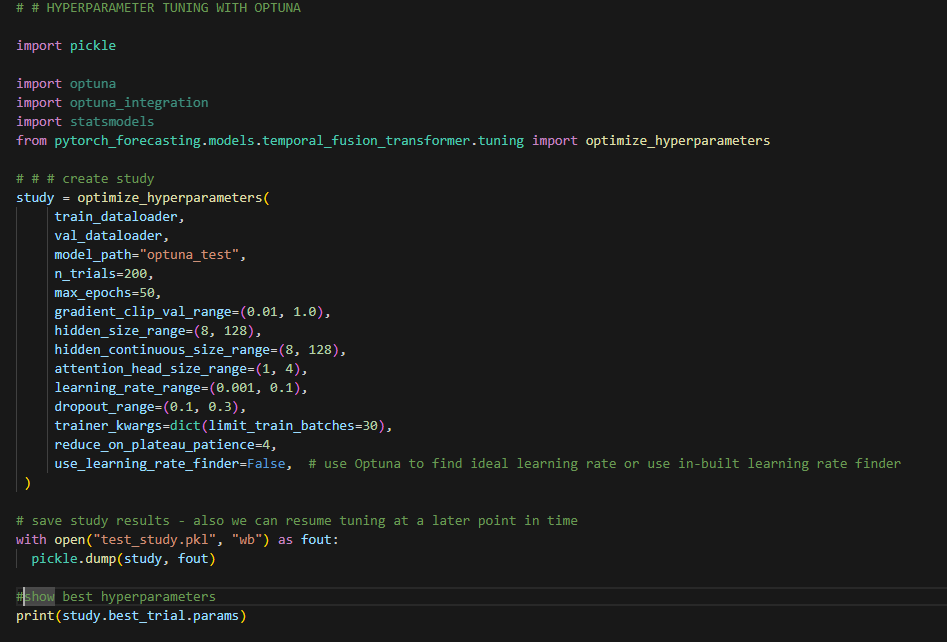

We also plotted model interpretation using the inbuilt function for it

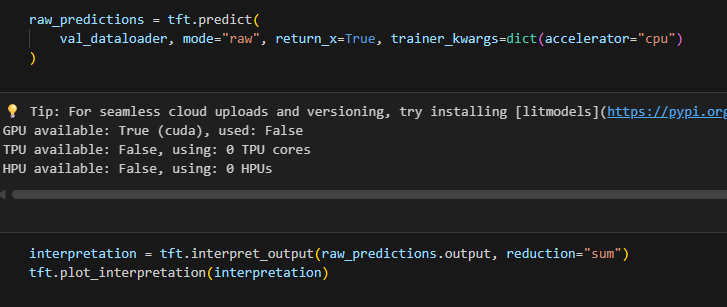

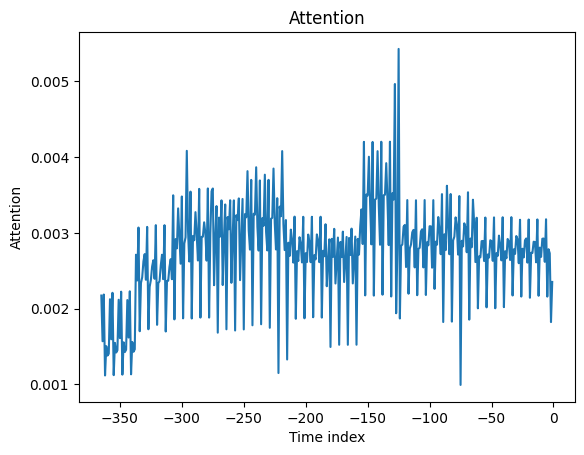

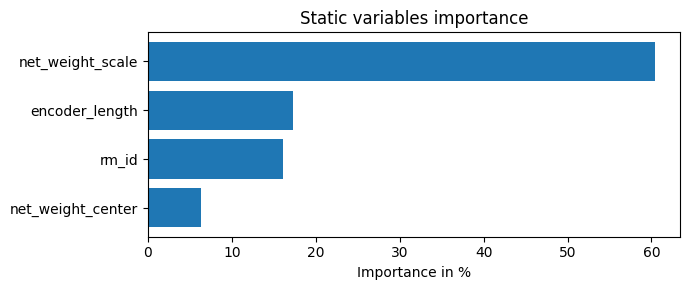

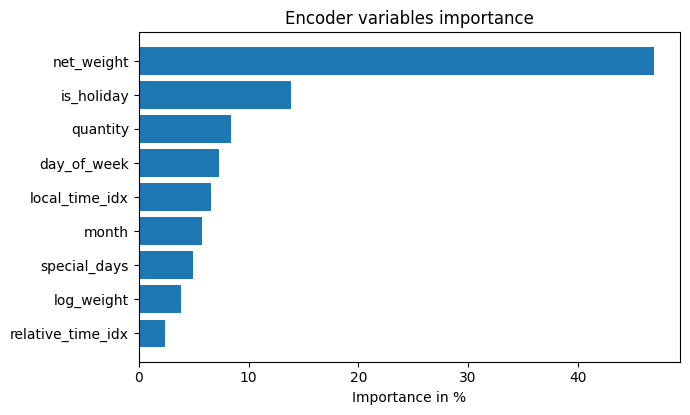

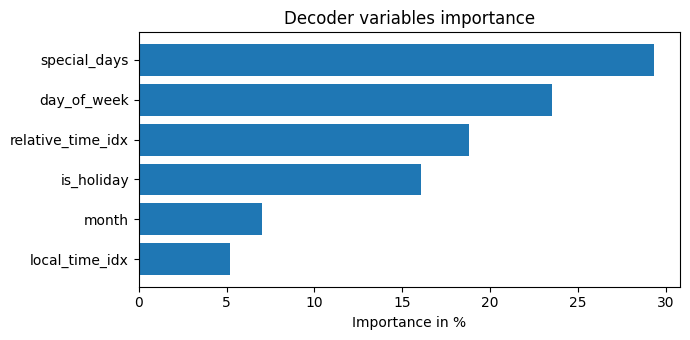